#1. Import Necessary Libraries




In [1]:
import tensorflow as tf

from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras import Model

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

import os
from pathlib import Path
import random
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sn

import cv2
import imutils
from skimage.io import imread

#split dataset
from sklearn.model_selection import train_test_split

#built in tools in Tensorflow for statistical treatment
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score, classification_report

#2. Connect to your Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#3. Unzip the Dataset File

In [3]:
!unzip "/content/gdrive/My Drive/Medplants Resources/medplants.zip"

Streaming output truncated to the last 5000 lines.
  inflating: medplants/Momordica charantia (Ampalaya)/mcharantia416.jpg  
  inflating: medplants/Momordica charantia (Ampalaya)/mcharantia417.jpg  
  inflating: medplants/Momordica charantia (Ampalaya)/mcharantia418.jpg  
  inflating: medplants/Momordica charantia (Ampalaya)/mcharantia419.jpg  
  inflating: medplants/Momordica charantia (Ampalaya)/mcharantia42.jpg  
  inflating: medplants/Momordica charantia (Ampalaya)/mcharantia420.jpg  
  inflating: medplants/Momordica charantia (Ampalaya)/mcharantia421.jpg  
  inflating: medplants/Momordica charantia (Ampalaya)/mcharantia422.jpg  
  inflating: medplants/Momordica charantia (Ampalaya)/mcharantia423.jpg  
  inflating: medplants/Momordica charantia (Ampalaya)/mcharantia424.jpg  
  inflating: medplants/Momordica charantia (Ampalaya)/mcharantia425.jpg  
  inflating: medplants/Momordica charantia (Ampalaya)/mcharantia426.jpg  
  inflating: medplants/Momordica charantia (Ampalaya)/mcharant

#4. Split the Dataset and Store into DataFrame

---



In [4]:
main_folder = 'medplants'
sub_folders = Path(main_folder ).glob('*')

rows = []
for folder in sub_folders:
	class_name = str(folder).replace("medplants/","")
	for file in os.listdir(folder):
		data = [str(folder)+"/"+file, class_name]
		rows.append(data)

#store the all data inside a pandas dataframe
df = pd.DataFrame(rows, columns=["Full Path", "Class Name"])

#split the frame with stratify=target_column to maintain equal split portions across all classes
x_train, x_test, y_train, y_test = train_test_split(df["Full Path"], df["Class Name"], test_size=0.2, random_state=7, shuffle=True, stratify=df["Class Name"])

#store the splitted portions into dataframe
dftrain = pd.DataFrame({'Full Path':x_train, 'Class Name':y_train})
dftest = pd.DataFrame({'Full Path':x_test, 'Class Name':y_test})

print(dftrain)
print(dftest)

                                              Full Path  \
6725  medplants/Peperomia pellucida (Ulasimang-bato)...   
7684  medplants/Combretum indicum (Niyog-niyogan)/ci...   
6200    medplants/Senna alata (Acapulco)/salata1200.jpg   
4307  medplants/Vitex negundo (Lagundi)/vnegundo802.jpg   
5537    medplants/Senna alata (Acapulco)/salata1172.jpg   
...                                                 ...   
9828  medplants/Blumea balsamifera (Sambong)/bbalsam...   
9931  medplants/Blumea balsamifera (Sambong)/bbalsam...   
538   medplants/Momordica charantia (Ampalaya)/mchar...   
4279  medplants/Vitex negundo (Lagundi)/vnegundo1025...   
2738  medplants/Allium sativum (Garlic)/asativum841.jpg   

                                Class Name  
6725  Peperomia pellucida (Ulasimang-bato)  
7684     Combretum indicum (Niyog-niyogan)  
6200                Senna alata (Acapulco)  
4307               Vitex negundo (Lagundi)  
5537                Senna alata (Acapulco)  
...                  

#5. Define Custom Function for Data Visualization

In [5]:
#params
#results - result from model prediction
#labels - the classes list
def generate_confusion_matrix(results, labels):
  cmn = results
  plt.figure(figsize=(10,7))
  sn.set(font_scale=1.4) # for label size
  sn.heatmap(cmn, annot=True, fmt='.2f', annot_kws={"size": 16}, xticklabels=labels, yticklabels=labels, cmap="Greens") # font size
  plt.show()

#params
#img_folder - path to folder
def show_images(img_folder):
  fig=plt.figure(figsize=(20,20))
  classes = sorted(Path(img_folder).glob('*'))
  i=0
  for cl in classes:
      file = random.choice(os.listdir(cl))
      image_path= os.path.join(cl, file)
      img=mpimg.imread(image_path)
      i=i+1
      fig.add_subplot(5,2,i)
      plt.imshow(img)

#params
#model - the trained model or the model loaded from file
#classes - the classes list
#img_folder - path to image
#size - size of the image for resizing to match CNN input
def predict_image(model, classes, img_path, size):
  # load the image
  image_orig = cv2.imread(img_path)
  image_orig = cv2.cvtColor(image_orig, cv2.COLOR_BGR2RGB)
  print(img_path)

  # pre-process the image for classification
  image = cv2.resize(image_orig, (size, size))
  image = img_to_array(image)
  image = np.expand_dims(image, axis=0)
  
  result = model.predict(image)
  class_id = result[0].argmax()
  classification = "Class: {} ({:.2f}%)".format(classes[class_id], result[0][class_id] * 100)
  
  plt.figure(figsize=(8, 8))
  plt.imshow(image_orig)
  plt.show()
  print("[PREDICTION] {}".format(classification))

#6. View Dataset

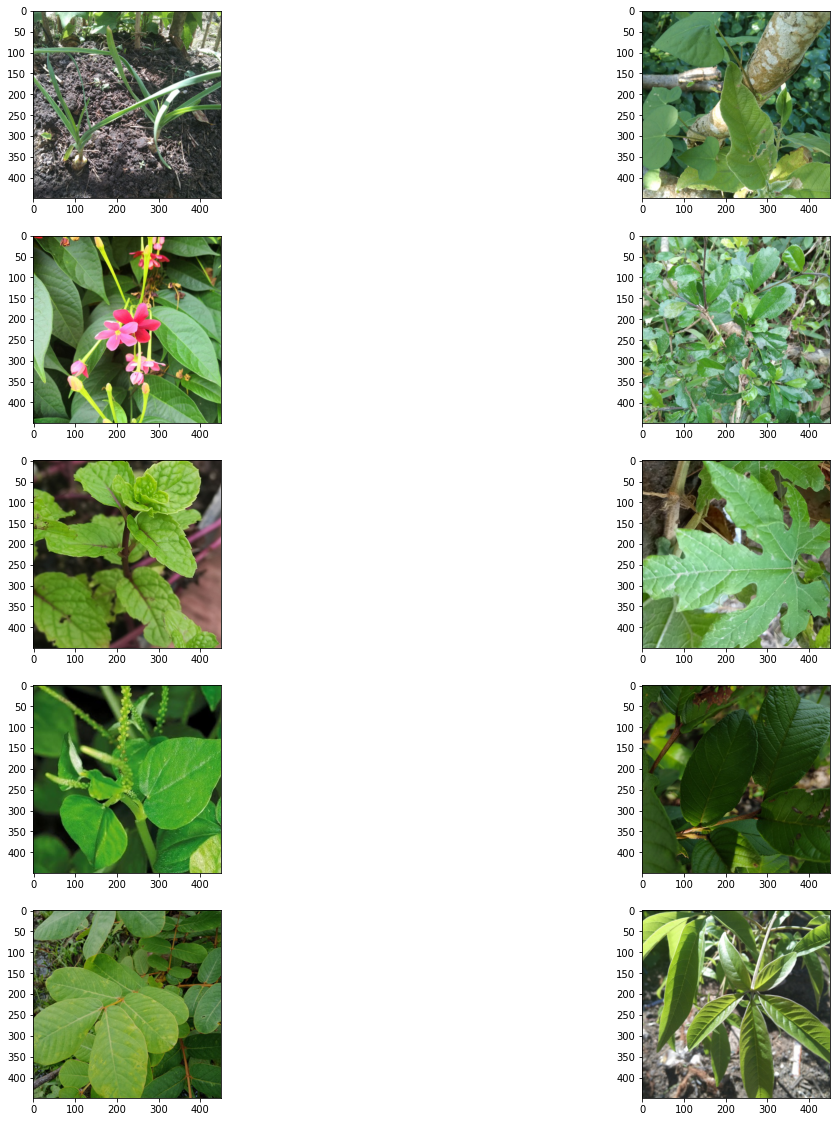

In [6]:
show_images("medplants")

#7. Define Constants

In [7]:
IMG_SIZE = 224
CHANNELS = 3

CLASSES = 10
EPOCH = 50
BATCH_SIZE = 32
LR = 0.0001
SEED = 42

#8. Define the CNN  

In [ ]:
#define the base model which is MobileNetV3
mobilenetv3 = MobileNetV3Large(include_top=False, 
                               input_shape = (IMG_SIZE,IMG_SIZE, CHANNELS))

#add additional layers and classification layer to the base model
x = GlobalAveragePooling2D()(mobilenetv3.output)
x=Dense(512,activation='relu')(x) 
x=Dense(1024,activation='relu')(x)
classifier=Dense(CLASSES,activation='softmax')(x)

#define the final model 
model=Model(name="MedNet", inputs=mobilenetv3.input, outputs=classifier)

#compile the model
opt = Adam(learning_rate=LR)
model.compile(loss="categorical_crossentropy", 
              optimizer = opt,
              metrics=['accuracy'])

model.summary()

#9. Prepare and Split Dataset

In [8]:
train_datagen=ImageDataGenerator(validation_split=0.25)

#Define the image data generator for the training
train_generator=train_datagen.flow_from_dataframe(
dataframe=dftrain,
x_col="Full Path",
y_col="Class Name",
subset="training",
batch_size=BATCH_SIZE,
seed=SEED,
shuffle=True,
class_mode="categorical",
target_size=(IMG_SIZE,IMG_SIZE))

#Define the image data generator for the validation
validation_generator=train_datagen.flow_from_dataframe(
dataframe=dftrain,
x_col="Full Path",
y_col="Class Name",
subset="validation",
batch_size=BATCH_SIZE,
seed=SEED,
shuffle=True,
class_mode="categorical",
target_size=(IMG_SIZE,IMG_SIZE))

#Define the image data generator for the evaluation/testing
test_datagen=ImageDataGenerator()
test_generator=test_datagen.flow_from_dataframe(
dataframe=dftest,
x_col="Full Path",
y_col="Class Name",
batch_size=BATCH_SIZE,
seed=SEED,
shuffle=False,
class_mode="categorical",
target_size=(IMG_SIZE,IMG_SIZE))

Found 6447 validated image filenames belonging to 10 classes.
Found 2149 validated image filenames belonging to 10 classes.
Found 2149 validated image filenames belonging to 10 classes.


#10. Train the Model

In [ ]:
history = model.fit(train_generator, 
              epochs=EPOCH,
              validation_data=validation_generator,
              batch_size = BATCH_SIZE)

Epoch 1/50
202/202 [==============================] - 69s 256ms/step - loss: 0.4171 - accuracy: 0.8984 - val_loss: 0.7770 - val_accuracy: 0.7450
Epoch 2/50
202/202 [==============================] - 49s 241ms/step - loss: 0.0266 - accuracy: 0.9929 - val_loss: 0.3629 - val_accuracy: 0.8893
Epoch 3/50
202/202 [==============================] - 49s 241ms/step - loss: 0.0088 - accuracy: 0.9983 - val_loss: 0.2597 - val_accuracy: 0.9200
Epoch 4/50
202/202 [==============================] - 48s 239ms/step - loss: 0.0070 - accuracy: 0.9975 - val_loss: 0.0947 - val_accuracy: 0.9660
Epoch 5/50
202/202 [==============================] - 51s 250ms/step - loss: 0.0048 - accuracy: 0.9983 - val_loss: 0.0861 - val_accuracy: 0.9702
Epoch 6/50
202/202 [==============================] - 49s 241ms/step - loss: 0.0062 - accuracy: 0.9983 - val_loss: 0.0402 - val_accuracy: 0.9870
Epoch 7/50
202/202 [==============================] - 50s 246ms/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.0198 - val_ac

#11. Plot the Training Results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.xlabel('Epoch')
plt.title('')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim([0,1.0])
plt.title('')
plt.xlabel('Epoch')
plt.show()

#12. Evaluate the Model


In [9]:
model_dir = "/content/gdrive/My Drive/Medplants Resources/CNN-MedNet.h5"
model = load_model(model_dir)

model.evaluate(test_generator)

68/68 [==============================] - 22s 156ms/step - loss: 0.0100 - accuracy: 0.9977


[0.01001798827201128, 0.9976733326911926]

Accuracy:  0.9976733364355514
Precision:  0.9977667820487222
Recall:  0.9976665923468836
F1 Score:  0.9977117076623762


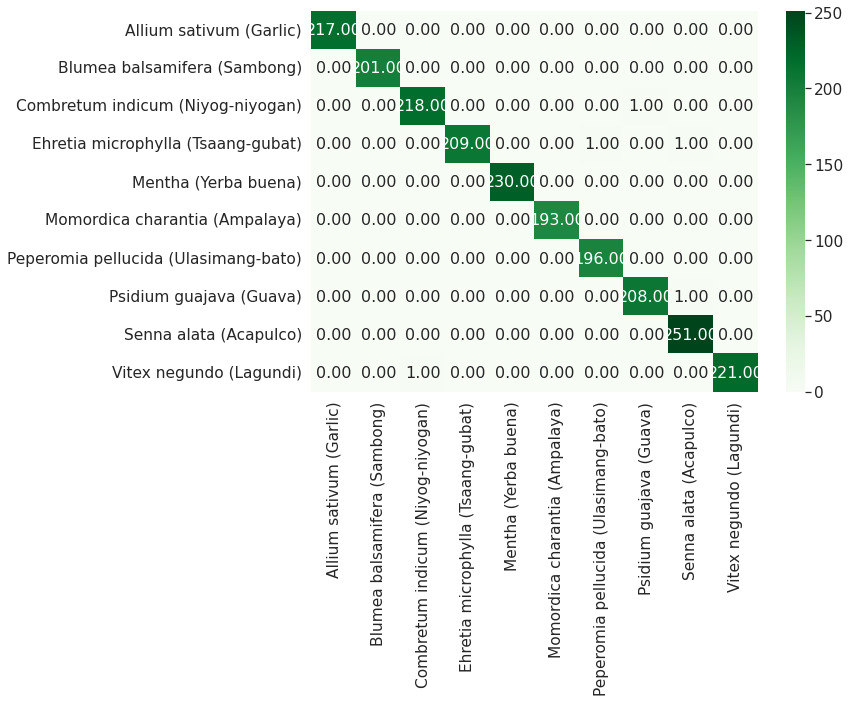

In [10]:
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)

main_folder = 'medplants'
sub_folders = sorted(Path(main_folder ).glob('*'))
labels = [str(x).replace("medplants/","") for x in sub_folders]

print("Accuracy: ", accuracy_score(test_generator.labels, y_pred))
print("Precision: ", precision_score(test_generator.labels, y_pred , average="macro"))
print("Recall: ", recall_score(test_generator.labels, y_pred , average="macro"))
print("F1 Score: ", f1_score(test_generator.labels, y_pred , average="macro"))
matrix = confusion_matrix(test_generator.labels, y_pred)
generate_confusion_matrix(matrix, labels)

#13. Create Predictions

In [ ]:
main_folder = 'medplants'
folder = random.choice(labels)
path = os.path.join(main_folder, folder)
file = random.choice(os.listdir(path))
img_path = os.path.join(path, file)

predict_image(load_model("/content/gdrive/My Drive/Medplants Resources/CNN-MedNet.h5"), labels, img_path, 224)

#14. Save the Model


In [ ]:
model.save("CNN-MedNet.h5")